Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

id: unique identifier
gender: "Male", "Female" or "Other"
age: age of the patient
hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
ever_married: "No" or "Yes"
work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
Residence_type: "Rural" or "Urban"
avg_glucose_level: average glucose level in blood
bmi: body mass index
smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
stroke: 1 if the patient had a stroke or 0 if not
Note: "Unknown" in smoking_status means that the information is unavailable for this patient


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)

In [62]:
df = pd.read_csv("stroke.csv")

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.shape

(5110, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [63]:
df.dropna(inplace = True) #drop the null value as 201 rows are gonna get affected bot total are 5000+ 

In [4]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [126]:
df.duplicated().sum()

0

In [127]:
df.duplicated().value_counts()

False    4909
dtype: int64

In [15]:
df.shape#no duplicates present in the data

(4909, 12)

In [17]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
df.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1304,6040,Female,46.0,0,0,No,Private,Rural,79.63,55.0,Unknown,0


In [19]:
df.work_type.value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [20]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [64]:
df.drop('id',inplace=True,axis = 1)

In [8]:
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [26]:
df.hypertension.value_counts()

0    4458
1     451
Name: hypertension, dtype: int64

451 have hypertension

In [27]:
df.heart_disease.value_counts()

0    4666
1     243
Name: heart_disease, dtype: int64

In [28]:
df.ever_married.value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [65]:
#feature distribution of categorical variables w.r.t target variable
def count_plot(col):
    sns.countplot(data = df,x =df[col],palette = 'Oranges',hue='stroke')
    plt.show()

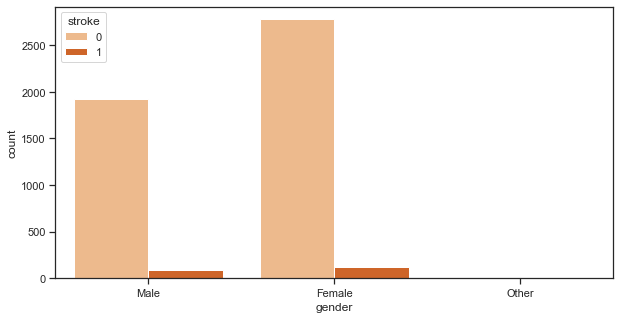

In [66]:
count_plot('gender')

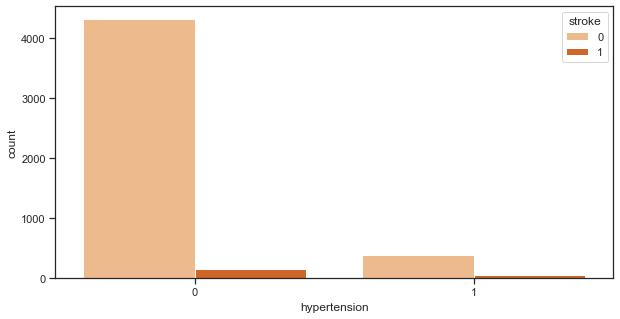

In [67]:
count_plot('hypertension')

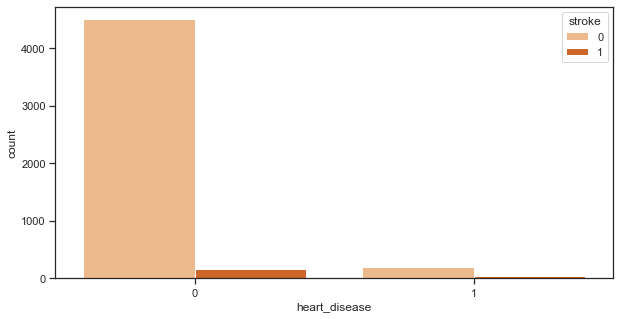

In [68]:
count_plot('heart_disease')

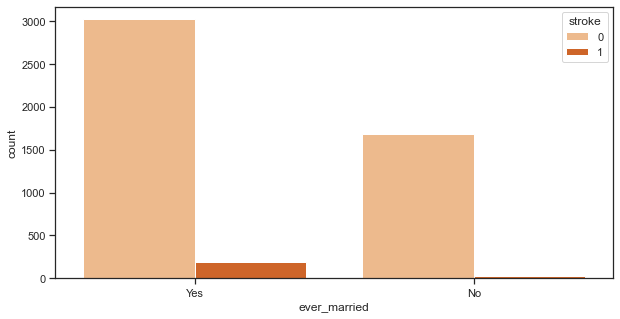

In [69]:
count_plot('ever_married')

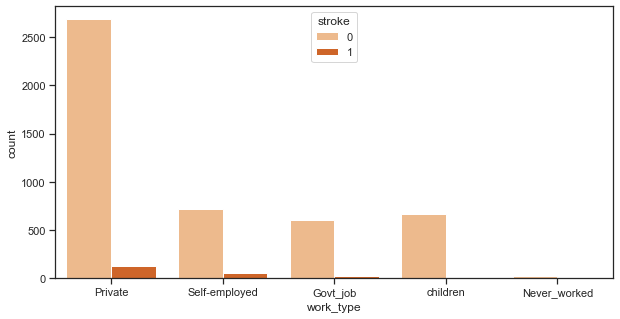

In [70]:
count_plot('work_type')

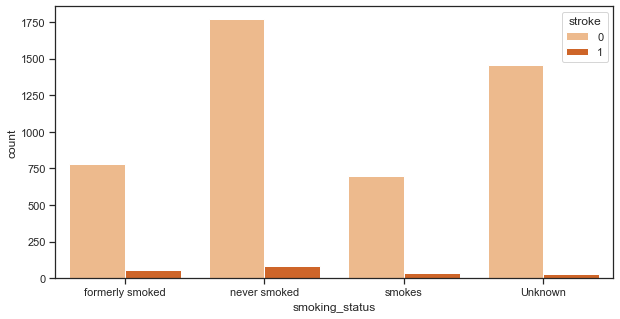

In [71]:
count_plot('smoking_status')

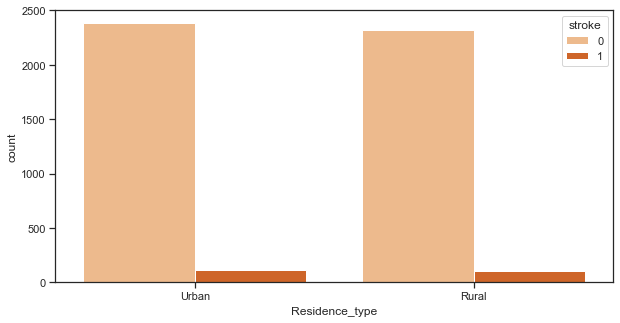

In [72]:
count_plot('Residence_type')

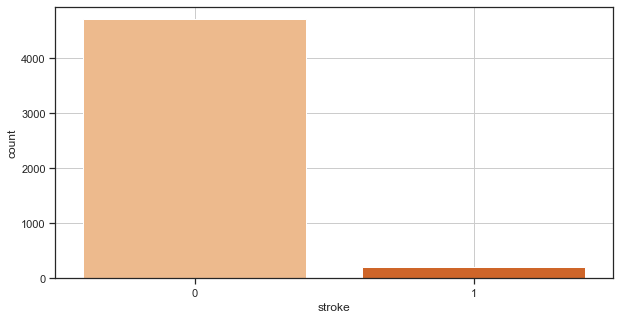

In [73]:
sns.set(style="ticks")
sns.countplot(data = df,x='stroke',palette='Oranges') #understanding target variable
plt.grid()
plt.show()

In [74]:
#feature distribution of continious variables
def kde_plot(col):
    sns.kdeplot(data=df,x =col,hue="stroke",fill=True,palette="YlOrBr")
    plt.show()

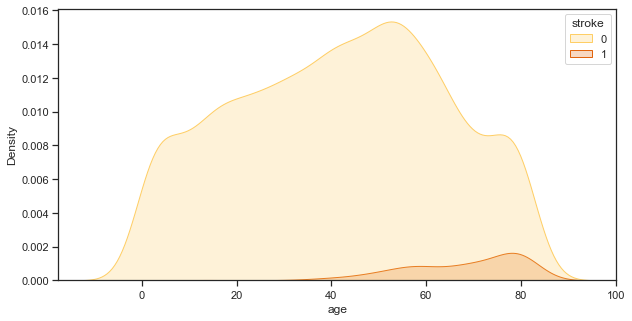

In [75]:
kde_plot('age')

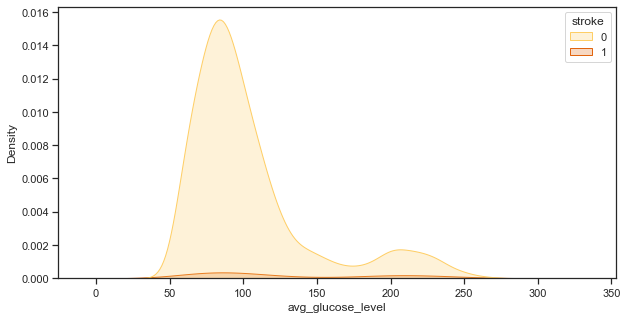

In [45]:
kde_plot('avg_glucose_level')

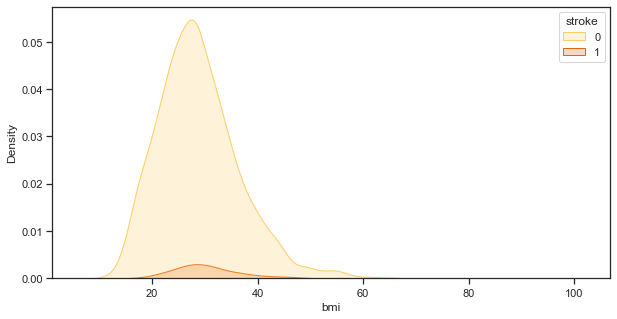

In [46]:
kde_plot('bmi')

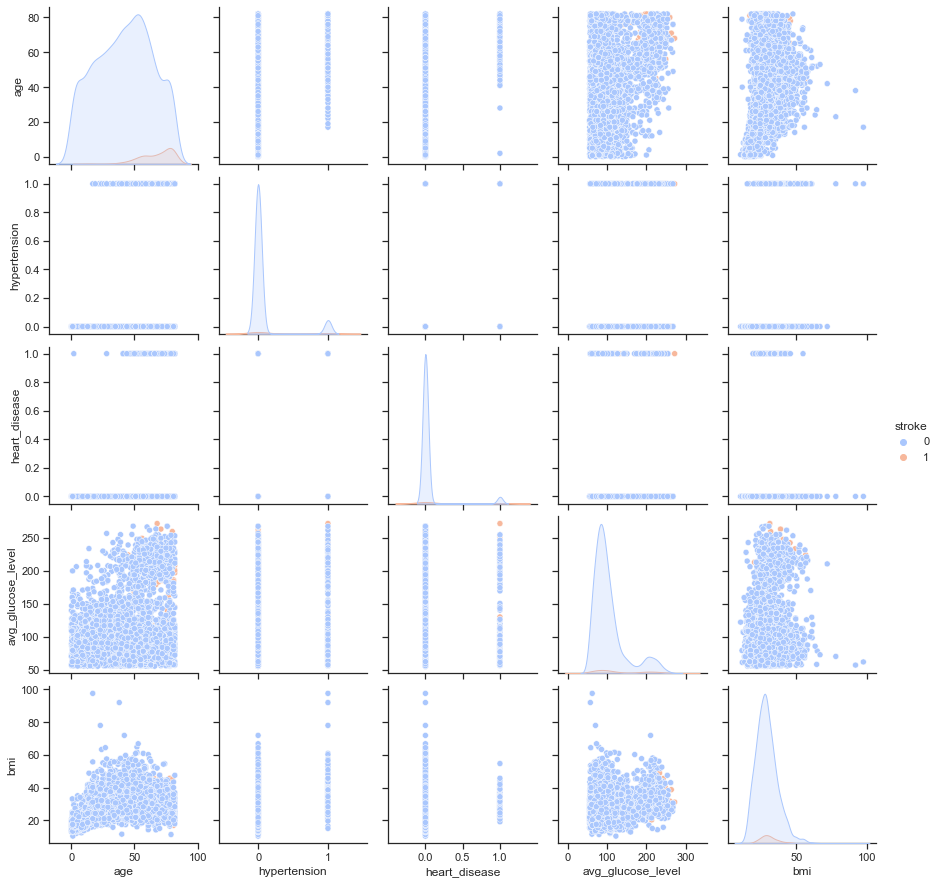

In [76]:
sns.pairplot(df,hue='stroke',palette = "coolwarm")
plt.show()

If we set the vmin value to -1 and the vmax value to 1, then only the cells with values between 30 and 70 will be displayed. This is called anchoring the colormap.

<AxesSubplot:>

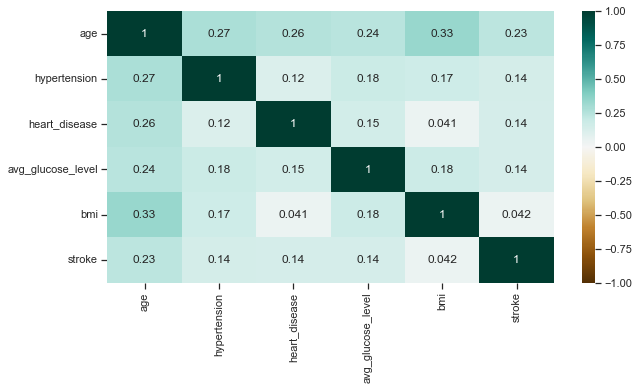

In [77]:
sns.heatmap(df.corr() ,vmin=-1, vmax=1, annot=True, cmap='BrBG')

#Insights from the EDA:
1.Female and male both have equal number of stroke cases while there is not any single case of stroke in other gender type.
2.Patient with private job have more number stroke cases then self employed and govt. job
3.There are few cases of strokes in children and those who are unemployed having no case
4.Both Urban and rural have equal number of stroke cases.so this is not a useful feature.
5.Stroke has the highest correlation with age
6.Age has the highest correlation with hypertension
7.As people start to age the risk of having a stroke is increasing most of stroke cases belong to 60-80 age group that means most of patients are in their older age.
8.Patients with stroke having heigher avg_glucose_level then 120.
9.normaly person who smoke are more likely have a chance of stroke but in our dataset smoking doesn't have much impact on stroke.

In [78]:
df['ever_married'] = df['ever_married'].replace({'Yes':1,'No':0})

In [79]:
df['gender'] = df['gender'].replace({'Male':1,'Female':0})

In [80]:
df['Residence_type']= df['Residence_type'].replace({'Urban':1,'Rural':0})

In [81]:
def work_type(col):
    if col == 'Private':
        return 0
    elif col == 'Self-employed':
        return 1
    elif col == 'Govt_job':
        return 2
    elif col == 'children':
        return 3
    else:
        return 4
df.work_type = df.work_type.apply(work_type)

In [82]:
df.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
888,0,59.0,1,0,1,0,0,99.06,23.4,never smoked,0


In [83]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,1,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,0,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,0,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,1,0,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,0,1,186.21,29.0,formerly smoked,1


In [84]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [85]:
def smoking_status(x):
    if x =='formerly smoked':
        return 0
    elif x == 'never smoked':
        return 1
    elif x == 'smokes':
        return 2
    else:
        return 3

In [86]:
df['smoking_status']=df['smoking_status'].apply(smoking_status)

In [59]:
df['work_type'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [87]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [88]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [89]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

one hot encoding for nominal columns

In [90]:
X = pd.get_dummies(X,columns = ['gender','work_type','smoking_status','ever_married','Residence_type'])

In [91]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_0,gender_1,gender_Other,work_type_0,work_type_1,...,work_type_3,work_type_4,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3,ever_married_0,ever_married_1,Residence_type_0,Residence_type_1
0,67.0,0,1,228.69,36.6,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
2,80.0,0,1,105.92,32.5,0,1,0,1,0,...,0,0,0,1,0,0,0,1,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
5,81.0,0,0,186.21,29.0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1


In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [93]:
X_test.shape

(1473, 21)

In [94]:
X_train.shape

(3436, 21)

In [95]:
y_train.shape

(3436,)

In [96]:
y_test.shape

(1473,)

In [97]:
pd.DataFrame(y_train).value_counts()

stroke
0         3299
1          137
dtype: int64

In [98]:
pd.DataFrame(y_test).value_counts()

stroke
0         1401
1           72
dtype: int64

In [99]:
#feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
#taking care of imbalanced dataset
from imblearn.over_sampling import SMOTE

In [101]:
s = SMOTE()

In [102]:
X_resample,y_resample = s.fit_resample(X_train,y_train.ravel())

In [103]:
pd.DataFrame(y_resample).value_counts()

0    3299
1    3299
dtype: int64

In [104]:
X_resample.shape

(6598, 21)

In [105]:
def models(x,y):
    accuracy = []
    f1score = []
    model = []
    
    model.append(LogisticRegression())
    model.append(KNeighborsClassifier())
    model.append(RandomForestClassifier())
    model.append(SVC())
    model.append(BaggingClassifier())
    model.append(GradientBoostingClassifier())
    model.append(AdaBoostClassifier(RandomForestClassifier()))
    
    for i in model:
        i.fit(x,y)
        pred = i.predict(X_test)
        
        accuracy.append((round(accuracy_score(y_test, pred), 1))*100)
        f1score.append((round(f1_score(y_test, pred), 1))*100)
        
        print(f'Model: {i}\nAccuracy: {accuracy_score(y_test, pred)}\nF1-score: {f1_score(y_test, pred)}\n\n')
        

In [106]:
models(X_resample,y_resample)

Model: LogisticRegression()
Accuracy: 0.7331975560081466
F1-score: 0.23091976516634052


Model: KNeighborsClassifier()
Accuracy: 0.845213849287169
F1-score: 0.1739130434782609


Model: RandomForestClassifier()
Accuracy: 0.9307535641547862
F1-score: 0.1206896551724138


Model: SVC()
Accuracy: 0.8560760353021045
F1-score: 0.2374100719424461


Model: BaggingClassifier()
Accuracy: 0.9083503054989817
F1-score: 0.09395973154362415


Model: GradientBoostingClassifier()
Accuracy: 0.8662593346911066
F1-score: 0.20883534136546184


Model: AdaBoostClassifier(base_estimator=RandomForestClassifier())
Accuracy: 0.9280380176510523
F1-score: 0.11666666666666665




Logistic Regression have a comparatively high f1-score than others.

In [107]:
lr = LogisticRegression()
lr.fit(X_resample, y_resample)
pred = lr.predict(X_test)

f1 = f1_score(y_test, pred)
print(f' f1_score is {round(f1, 1)} with Logistic Regression')

 f1_score is 0.2 with Logistic Regression


F1 scores can range from 0 to 1, with 1 representing a model that perfectly classifies each observation into the correct class and 0 representing a model that is unable to classify any observation into the correct class.